# Automobile Dataset
[EDA for This dataset](https://github.com/romilsiddhapura/ml_practices_2018/blob/master/Labs/Lab1/Romil/Notebooks/Automobile_EDA.ipynb)  
[Data for the same](https://github.com/romilsiddhapura/ml_practices_2018/blob/master/Labs/Lab1/Romil/Data/automobile.csv)

In [1]:
#Importing some necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve,validation_curve
import sys
from io import StringIO
from sklearn.linear_model import SGDClassifier

In [2]:
#Loading the dataset, and adding names to columns.
data = pd.read_csv('../../Lab1/Romil/Data/processed_data_Automobile.csv',sep='\t')
data.head()

,Unnamed: 0,symboling,norm_losses,brand,fuel,aspiration,doors,body_style,drive_wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495
1,1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500
2,2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450


** Converting all the categorical data into numeric through one hot encoding.**
```
Because all the categorical data are in string format. Attribute having string format will not work in linearregression as it works with matrix multiplication.
```

In [3]:
#One-hot Encoding
data_dummy = pd.get_dummies(data)
#Making price as target feature
y = data.price.values

In [4]:
#Checking the types of features after endcoding
data_dummy.dtypes

Unnamed: 0                   int64
symboling                    int64
norm_losses                  int64
wheel-base                 float64
length                     float64
width                      float64
height                     float64
curb-weight                  int64
engine-size                  int64
bore                       float64
stroke                     float64
compression-ratio          float64
horsepower                   int64
peak-rpm                   float64
city-mpg                     int64
highway-mpg                  int64
price                        int64
brand_alfa-romero            uint8
brand_audi                   uint8
brand_bmw                    uint8
brand_chevrolet              uint8
brand_dodge                  uint8
brand_honda                  uint8
brand_isuzu                  uint8
brand_jaguar                 uint8
brand_mazda                  uint8
brand_mercedes-benz          uint8
brand_mercury                uint8
brand_mitsubishi    

In [5]:
#Splitting the dataset into training data and teting data
X_train, X_test, y_train, y_test = train_test_split(data_dummy, y, test_size=0.33, random_state=42)

In [7]:
#Checking the size of training and testing dataset after splitting
X_train.shape,X_test.shape

((137, 77), (68, 77))

### Linear regression on all features

In [8]:
reg = LinearRegression(n_jobs=-1)
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [9]:
reg.score(X_test,y_test)

1.0

In [10]:
#Predicting the probability for testing data
y_pred = reg.predict(X_test)

### Mean absolute Error

In [14]:
metrics.mean_absolute_error(y_test,y_pred)

5.791341262759969e-12

### Mean Square Error

In [12]:
metrics.mean_squared_error(y_test,y_pred)

8.041898572923626e-23

### Applying seaborn regression plot function

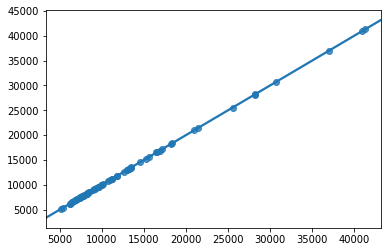

In [15]:
sns.regplot(y_test,y_pred)

### Linear regression on selected features

In [16]:
data_new = data.drop(['symboling','doors','norm_losses','height','compression-ratio','price'],axis= 1)

In [17]:
#APplying one-hot encoding
df_dummy = pd.get_dummies(data_new)

In [19]:
df_dummy.head()

,Unnamed: 0,wheel-base,length,width,curb-weight,engine-size,bore,stroke,horsepower,peak-rpm,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,0,88.6,168.8,64.1,2548,130,3.47,2.68,111,5000.0,...,0,0,0,0,0,0,0,1,0,0
1,1,88.6,168.8,64.1,2548,130,3.47,2.68,111,5000.0,...,0,0,0,0,0,0,0,1,0,0
2,2,94.5,171.2,65.5,2823,152,2.68,3.47,154,5000.0,...,0,0,0,0,0,0,0,1,0,0
3,3,99.8,176.6,66.2,2337,109,3.19,3.40,102,5500.0,...,0,0,0,0,0,0,0,1,0,0
4,4,99.4,176.6,66.4,2824,136,3.19,3.40,115,5500.0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
df_dummy.columns

Index(['Unnamed: 0', 'wheel-base', 'length', 'width', 'curb-weight',
       'engine-size', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'brand_alfa-romero', 'brand_audi', 'brand_bmw',
       'brand_chevrolet', 'brand_dodge', 'brand_honda', 'brand_isuzu',
       'brand_jaguar', 'brand_mazda', 'brand_mercedes-benz', 'brand_mercury',
       'brand_mitsubishi', 'brand_nissan', 'brand_peugot', 'brand_plymouth',
       'brand_porsche', 'brand_renault', 'brand_saab', 'brand_subaru',
       'brand_toyota', 'brand_volkswagen', 'brand_volvo', 'fuel_diesel',
       'fuel_gas', 'aspiration_std', 'aspiration_turbo',
       'body_style_convertible', 'body_style_hardtop', 'body_style_hatchback',
       'body_style_sedan', 'body_style_wagon', 'drive_wheels_4wd',
       'drive_wheels_fwd', 'drive_wheels_rwd', 'engine-location_front',
       'engine-location_rear', 'engine-type_dohc', 'engine-type_dohcv',
       'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf',
   

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_dummy, y, test_size=0.33, random_state=42)

In [22]:
reg = LinearRegression()

In [23]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    1.8s finished


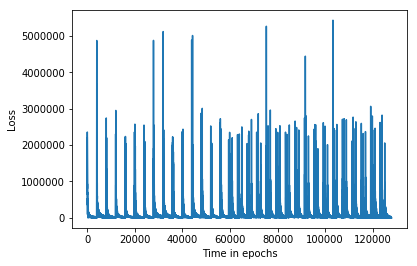

In [24]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
clf = SGDClassifier(max_iter=1000,verbose=1,n_jobs=-1)
clf.fit(X_train,y_train)
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
plt.figure()
plt.plot( loss_list)
#plt.savefig("warmstart_plots/pure_SGD.png")
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

In [25]:
reg.score(X_test,y_test)

0.86526107777477

In [29]:
y_pred = reg.predict(X_test)

In [30]:
metrics.mean_squared_error(y_test,y_pred)

8736882.60980869

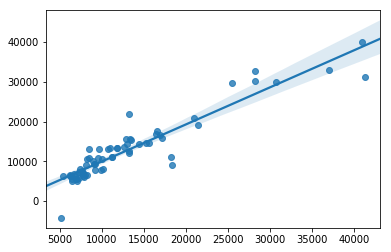

In [31]:
sns.regplot(y_test,y_pred)

### cross-checking the predicted prices with original one.

In [32]:
y_test[0:10]

array([30760, 13207,  9549, 11850, 28248,  7799,  7788,  9258, 10198,
        7775])

In [33]:
y_pred[0:10]

array([29938.93836791, 21780.39990458, 10770.75125583, 13426.16240876,
       30110.51490013,  6993.003927  ,  6418.03827598,  7905.24487024,
        8146.59021551,  7073.8094845 ])

## Plotting the learning curve

In [29]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/home/romil/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

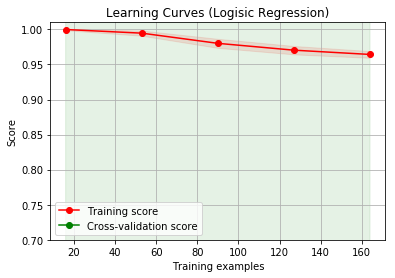

In [30]:
# Plotting for Logistic Regression
title = "Learning Curves (Logisic Regression)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = LinearRegression()
plot_learning_curve(estimator, title, df_dummy, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

